## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


### Team:

- Martín Jurado .................................................. A01795568
- Lineth Guerra .................................................. A01795639
- Erick Eduardo Betancourt ........................... A01795545
- Luis Alejandro González Castellanos ................. A01795481
- Jesús Armando Anaya Orozco .................... A01795464

Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [1]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 6.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 151.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 153.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 138.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 12.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 155.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 30.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 7.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 16.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 57.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102

In [2]:
!pip install scipy==1.9.3
!pip install scikit-plot
#you may receive a message of restarting session, this is OK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 41.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 92.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.2
    Uninstalling scipy-1.11.2:
      Successfully uninstalled scipy-1.11.2


In [3]:
!pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

## Import libraries

In [101]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torch import optim
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import gc
from tqdm import tqdm

import itertools
import matplotlib.pyplot as plt
import pandas as pd
import random


In [5]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [6]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [7]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [8]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [9]:
#test tokens
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


In [10]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [11]:
# set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


In [12]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [13]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [14]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [15]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

In [16]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

In [17]:
EMBEDDING_SIZE = 300
NEURONS = 256
LAYERS = 2
NUM_CLASSES = 4

In [18]:
def accuracy(model, loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation
        for x, y in loader:
            x, y = x.to(device), y.to(device)  # Ensure data is on the correct device
            outputs = model(x)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class for each sample
            total += y.size(0)  # Total number of samples
            correct += (predicted == y).sum().item()  # Count correct predictions
    
    model.train()  # Set the model back to training mode
    return correct / total  # Return accuracy as a proportion

In [56]:
def train(model, optimiser, epochs=100, patience=2, min_delta=0.01):
    criterion = nn.CrossEntropyLoss()  # Loss function for classification
    best_val_accuracy = 0.0  # Track the best validation accuracy
    patience_counter = 0  # Count epochs without significant improvement
    accuracy_history = []  # Track accuracy history
    loss_history = []  # Track loss history
    
    for epoch in range(epochs):
        # Set model to training mode
        model.train()

        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            # Convert input and labels to the correct device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Ensure labels are of correct type
            labels = labels.to(torch.long)

            optimiser.zero_grad()  # Reset gradients for each batch

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimiser.step()

            running_loss += loss.item()  # Accumulate loss for this epoch

        # Print average loss for this epoch
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

        # Validation phase
        val_acc = accuracy(model, val_loader)
        accuracy_history.append(val_acc)
        print(f"Validation Accuracy: {val_acc:.2f}%")

        # Check if validation accuracy improved by more than `min_delta`
        if val_acc > best_val_accuracy + min_delta:
            best_val_accuracy = val_acc  # Update best accuracy
            patience_counter = 0  # Reset patience counter
            print(f"Improved validation accuracy to {val_acc:.2f}%")
        else:
            patience_counter += 1  # Increment patience counter
            print(f"No significant improvement. Patience counter: {patience_counter}/{patience}")

        # Early stopping if patience is exceeded
        if patience_counter >= patience:
            print("Early stopping due to no significant improvement in validation accuracy.")
            break

    print("Training complete.")
    
    return accuracy_history, loss_history

In [80]:
def plot_train_loss_and_accuracy(title, accuracy_history, loss_history):
    # Plotting the training loss and accuracy through epochs
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    epochs = len(accuracy_history)
    fig.suptitle(title)
    
    for i, (history, title) in enumerate(zip([accuracy_history, loss_history], ["Accuracy", "Loss"])):
        ax[i].plot(range(1, epochs+1), history)
        ax[i].set_title(f"Training {title}")
        ax[i].set_xlabel("Epoch")
        ax[i].set_ylabel(title)
        ax[i].grid(True)
        
    plt.show()

### Addeding a Grid Search to find the best hyperparameters

In [39]:
def grid_search_with_plot(model_class, train_loader, val_loader, embed_size, num_classes, learning_rates, hidden_sizes, num_layers_options, epochs=10):
    """
    Performs grid search for hyperparameter tuning and returns results.
    
    Parameters:
    - model_class: Class of the model (Simple_RNN_Model, GRU_Model, or LSTM_Model).
    - train_loader: DataLoader for training data.
    - val_loader: DataLoader for validation data.
    - embed_size: Size of the embedding layer.
    - num_classes: Number of output classes.
    - learning_rates: List of learning rates to test.
    - hidden_sizes: List of hidden layer sizes to test.
    - num_layers_options: List of layer numbers to test.
    - epochs: Number of epochs to train for each configuration.
    
    Returns:
    - best_params: Dictionary of the best hyperparameters.
    - best_acc: Best validation accuracy achieved.
    - results_df: DataFrame containing the loss and accuracy for each epoch and hyperparameter combination.
    """
    results = []
    best_acc = 0
    best_params = {}

    print(f"Grid search for {model_class.__name__} started.")
    
    # Grid search over all combinations
    for lr, hidden, layers in itertools.product(learning_rates, hidden_sizes, num_layers_options):
        title = f"Case: LR={lr}, Neurons={hidden}, Layers={layers}"
        print(f"Validating {title}")
        
        # Set seed for reproducibility
        torch.manual_seed(42)
        np.random.seed(42)
            
        # Initialize the model with current hyperparameters
        model = model_class(embed_size=embed_size, hidden=hidden, layers=layers, num_classes=num_classes).to(device)
        
        # Define optimizer
        optimizer = optim.Adam(model.parameters(), lr=lr)
        
        # Track loss and accuracy for each epoch
        epoch_losses = []
        epoch_accuracies = []
        
        # Training loop for fixed number of epochs
        for epoch in tqdm(range(epochs), desc="Epochs"):
            model.train()
            running_loss = 0.0
            
            for x, y in train_loader:
                x, y = x.to(device), y.to(device).long()
                optimizer.zero_grad()
                outputs = model(x)
                loss = F.cross_entropy(outputs, y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            
            avg_loss = running_loss / len(train_loader)
            val_acc = accuracy(model, val_loader)
            
            epoch_losses.append(avg_loss)
            epoch_accuracies.append(val_acc)
        
        # Append results for the current combination
        for epoch, (loss, acc) in enumerate(zip(epoch_losses, epoch_accuracies)):
            results.append({
                "Model": model_class.__name__,
                "Learning Rate": lr,
                "Hidden Size": hidden,
                "Layers": layers,
                "Epoch": epoch + 1,
                "Loss": loss,
                "Accuracy": acc,
                "Title": title
            })
        
        # Update best configuration if this is the highest accuracy seen
        if val_acc > best_acc:
            best_acc = val_acc
            best_params = {'learning_rate': lr, 'hidden_size': hidden, 'layers': layers}

    # Convert results to a DataFrame for later plotting
    results_df = pd.DataFrame(results)

    print("Best Configuration:", best_params)
    print("Best Validation Accuracy:", best_acc)
    
    return best_params, best_acc, results_df


In [50]:
def plot_grid_search_results(results_df):
    """
    Plots the results of a grid search.
    
    Parameters:
    - results_df: DataFrame containing the loss and accuracy for each epoch and hyperparameter combination.
    """
    # Define a list of markers to differentiate each line visually
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x', '+', '*']  # Add more if needed

    # Plotting in 2 rows, 1 column layout using only matplotlib
    plt.figure(figsize=(15, 12))

    # Unique titles to loop through for each combination and cycling through markers
    titles = results_df['Title'].unique()
    marker_cycle = itertools.cycle(markers)  # Cycle through markers

    # Plot Loss Curve
    plt.subplot(2, 1, 1)
    for title in titles:
        subset = results_df[results_df['Title'] == title]
        plt.plot(subset['Epoch'], subset['Loss'], marker=next(marker_cycle), label=title)
    plt.title("Loss Curve for Different Hyperparameter Combinations")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Reset the marker cycle for the accuracy plot
    marker_cycle = itertools.cycle(markers)

    # Plot Accuracy Curve
    plt.subplot(2, 1, 2)
    for title in titles:
        subset = results_df[results_df['Title'] == title]
        plt.plot(subset['Epoch'], subset['Accuracy'], marker=next(marker_cycle), label=title)
    plt.title("Accuracy Curve for Different Hyperparameter Combinations")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

### Example 1: RNN model

In the following model architecture, we will use an embedding layer to convert the words into vectors, followed by an RNN layer and a linear layer to make the final prediction.


In [44]:
class Simple_RNN_Model(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        
        # Embedding layer to convert token indices to embeddings
        self.embedding_layer = nn.Embedding(
            num_embeddings=len(vocab),
            embedding_dim=embed_size
        )
        
        # complete this code/
        # You may use PyTorch nn.GRU(), nn.RNN(), or nn.LSTM()
        
        self.rnn = nn.RNN(
            input_size=embed_size,
            hidden_size=hidden,
            num_layers=layers,
            batch_first=True,
        )
        
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden, num_classes) 

    def forward(self, x):
        embedded = self.embedding_layer(x)
        
        # Forward pass through the RNN
        output, _ = self.rnn(embedded)
        
        # Take the last output from the sequence for classification
        output = output[:, -1, :]
        
        # Fully connected layer for final output
        return self.fc(output)


#### Looking for the best hyperparameters using Grid Search for the Simple RNN model

In [45]:
learning_rates = [1e-3, 1e-4, 1e-5]
hidden_sizes = [128, 256, 512]
num_layers_options = [2, 3]

# Example for Simple RNN Model
best_params_rnn, best_acc_rnn, results_df_rnn = grid_search_with_plot(
    model_class=Simple_RNN_Model,
    train_loader=train_loader,
    val_loader=val_loader,
    embed_size=EMBEDDING_SIZE,
    num_classes=NUM_CLASSES,
    learning_rates=learning_rates,
    hidden_sizes=hidden_sizes,
    num_layers_options=num_layers_options,
    epochs=10
)

Grid search for Simple_RNN_Model started.
Validating Case: LR=0.001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:03<00:00,  6.35s/it]


Validating Case: LR=0.001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:05<00:00,  6.57s/it]


Validating Case: LR=0.001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:17<00:00,  7.80s/it]


Validating Case: LR=0.001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:28<00:00,  8.84s/it]


Validating Case: LR=0.001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [01:21<00:00,  8.16s/it]


Validating Case: LR=0.001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [01:30<00:00,  9.10s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:03<00:00,  6.39s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:06<00:00,  6.66s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:17<00:00,  7.80s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:28<00:00,  8.81s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [01:21<00:00,  8.11s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [01:30<00:00,  9.04s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:03<00:00,  6.39s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:06<00:00,  6.60s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:17<00:00,  7.79s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:27<00:00,  8.78s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [01:21<00:00,  8.12s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [01:30<00:00,  9.06s/it]

Best Configuration: {'learning_rate': 0.0001, 'hidden_size': 256, 'layers': 3}
Best Validation Accuracy: 0.87825


Best Configuration for Simple RNN Model: {'learning_rate': 0.0001, 'hidden_size': 256, 'layers': 3}


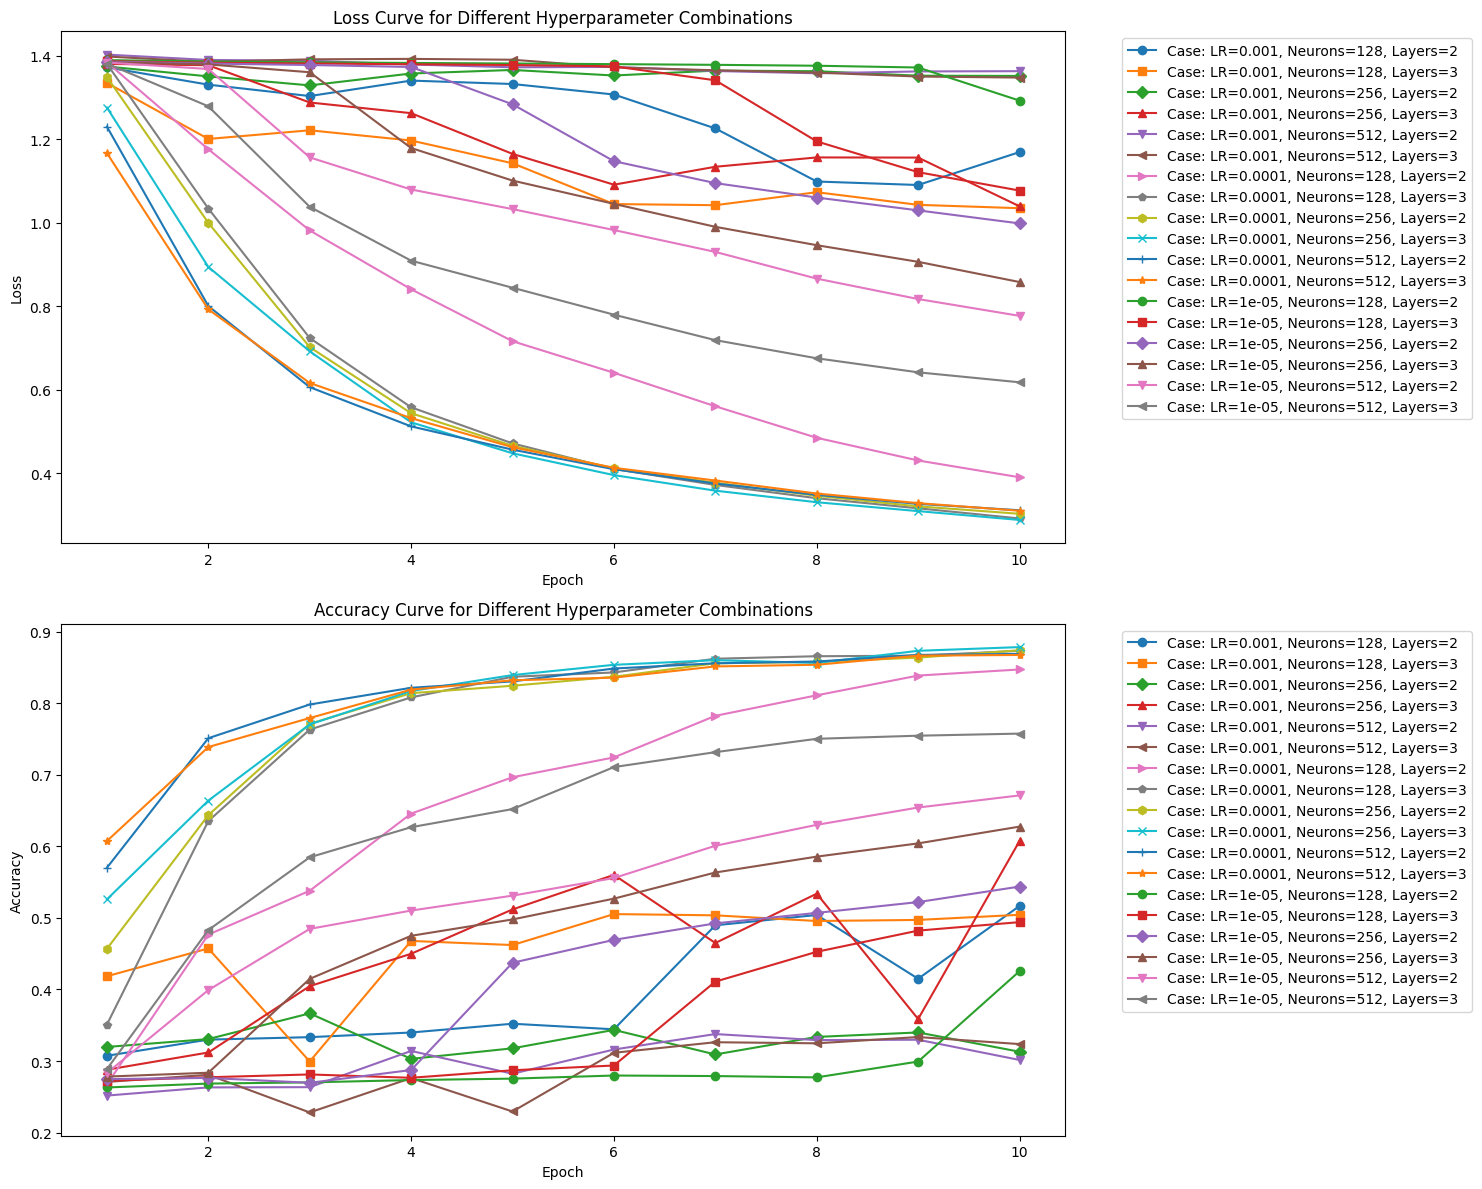

In [51]:
# Plotting Grid Search Results for Simple RNN Model

print(f"Best Configuration for Simple RNN Model: {best_params_rnn}")

plot_grid_search_results(results_df_rnn)

Running first example using a RNN model

In [62]:
# Added seed for reproducibility
torch.manual_seed(42)

epochs = 10
lr = best_params_rnn['learning_rate']
neurons = best_params_rnn['hidden_size']
layers = best_params_rnn['layers']

# instantiate model
rnn_model = Simple_RNN_Model(EMBEDDING_SIZE, neurons, layers, NUM_CLASSES)
rnn_model.to(device)

# The adam optimiser is used, we added the weight decay parameter to regularize the weights, for suggestion of the professor, it is fixed at 1e-4
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr, weight_decay=1e-4)


Training the RMM model example with the selected parameters

- embedding_size = 300
- neurons = 512
- layers = 2
- classes = 4

In [63]:
# Added seed for reproducibility
torch.manual_seed(42)

print(f"Training Simple RNN Model with LR={lr}, Neurons={neurons}, Layers={layers}")

accuracy_history_rnn, loss_history_rnn = train(rnn_model, optimiser=optimiser,  epochs=epochs)

Training Simple RNN Model with LR=0.0001, Neurons=256, Layers=3


Epoch 1/10: 100%|██████████| 422/422 [00:08<00:00, 48.25it/s]


Epoch [1/10], Loss: 1.3255
Validation Accuracy: 0.45%
Improved validation accuracy to 0.45%


Epoch 2/10: 100%|██████████| 422/422 [00:08<00:00, 48.58it/s]


Epoch [2/10], Loss: 0.9933
Validation Accuracy: 0.67%
Improved validation accuracy to 0.67%


Epoch 3/10: 100%|██████████| 422/422 [00:08<00:00, 48.15it/s]


Epoch [3/10], Loss: 0.7303
Validation Accuracy: 0.75%
Improved validation accuracy to 0.75%


Epoch 4/10: 100%|██████████| 422/422 [00:08<00:00, 48.35it/s]


Epoch [4/10], Loss: 0.5999
Validation Accuracy: 0.78%
Improved validation accuracy to 0.78%


Epoch 5/10: 100%|██████████| 422/422 [00:08<00:00, 47.98it/s]


Epoch [5/10], Loss: 0.5288
Validation Accuracy: 0.81%
Improved validation accuracy to 0.81%


Epoch 6/10: 100%|██████████| 422/422 [00:08<00:00, 47.99it/s]


Epoch [6/10], Loss: 0.4742
Validation Accuracy: 0.82%
Improved validation accuracy to 0.82%


Epoch 7/10: 100%|██████████| 422/422 [00:08<00:00, 48.19it/s]


Epoch [7/10], Loss: 0.4429
Validation Accuracy: 0.82%
No significant improvement. Patience counter: 1/2


Epoch 8/10: 100%|██████████| 422/422 [00:08<00:00, 47.97it/s]


Epoch [8/10], Loss: 0.4194
Validation Accuracy: 0.84%
Improved validation accuracy to 0.84%


Epoch 9/10: 100%|██████████| 422/422 [00:08<00:00, 48.21it/s]


Epoch [9/10], Loss: 0.3940
Validation Accuracy: 0.84%
No significant improvement. Patience counter: 1/2


Epoch 10/10: 100%|██████████| 422/422 [00:08<00:00, 47.75it/s]


Epoch [10/10], Loss: 0.3808
Validation Accuracy: 0.85%
No significant improvement. Patience counter: 2/2
Early stopping due to no significant improvement in validation accuracy.
Training complete.


In [64]:
print(f'Test accuracy for Simple RNN is: {accuracy(rnn_model, test_loader):.4f}')

Test accuracy for Simple RNN is: 0.8528


#### Plotting the loss and accuracy behaviors from the training process

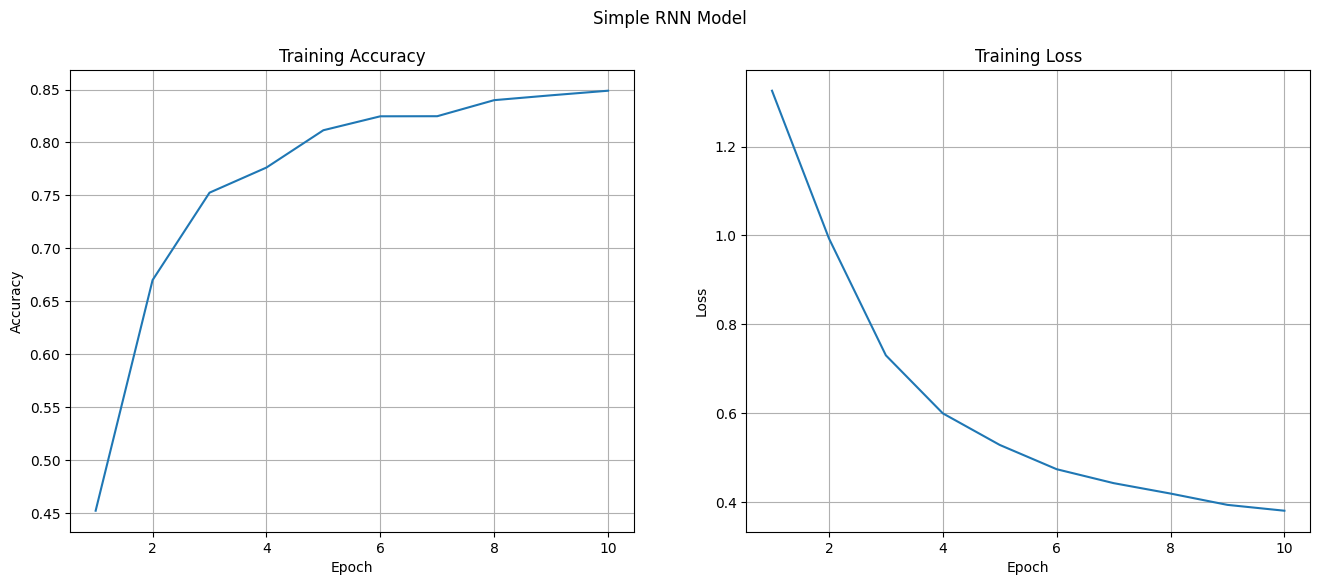

In [81]:
plot_train_loss_and_accuracy("Simple RNN Model", accuracy_history_rnn, loss_history_rnn)

The training curves for the Simple RNN model show effective learning over the 10 epochs, with accuracy steadily increasing and loss consistently decreasing. The accuracy rises sharply in the first few epochs, reaching around 85% by the end, indicating that the model is successfully capturing patterns in the data. The loss curve mirrors this, with a steep decline initially and then leveling off as training progresses, suggesting that the model is converging. The flattening of both curves towards the end suggests that the Simple RNN has reached a stable performance level on the dataset, but may have limited capacity to further improve with additional epochs.

### GRU model

In [31]:
class GRU_Model(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        
        # Embedding layer to convert token indices to embeddings
        self.embedding_layer = nn.Embedding(
            num_embeddings=len(vocab),
            embedding_dim=embed_size
        )
        
        # GRU layer for improved sequence handling
        self.rnn = nn.GRU(
            input_size=embed_size,
            hidden_size=hidden,
            num_layers=layers,
            batch_first=True,
        )
        
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden, num_classes) 

    def forward(self, x):
        embedded = self.embedding_layer(x)
        
        # Forward pass through the GRU
        output, _ = self.rnn(embedded)
        
        # Take the last output from the sequence for classification
        output = output[:, -1, :]
        
        # Fully connected layer for final output
        return self.fc(output)


#### Looking for the best hyperparameters using Grid Search for the GRU model

We will test the following hyperparameters:

The candidate hyperparameters are:
- learning rates = [1e-3, 1e-4, 1e-5]
- hidden_sizes = [128, 256, 512]
- num_layers = [2, 3]

We are selecting learning rate 1e-3, and 2 hidden layers, as the starting points because they are the most common numbers of LR and layers in the literature.

In [34]:
learning_rates = [1e-3, 1e-4, 1e-5]
hidden_sizes = [128, 256, 512]
num_layers_options = [2, 3]

# Example for Simple RNN Model
best_params_gru, best_acc_gru, results_df_gru = grid_search_with_plot(
    model_class=GRU_Model,
    train_loader=train_loader,
    val_loader=val_loader,
    embed_size=EMBEDDING_SIZE,
    num_classes=NUM_CLASSES,
    learning_rates=learning_rates,
    hidden_sizes=hidden_sizes,
    num_layers_options=num_layers_options,
    epochs=10
)

Validating case: GRU_Model | LR=0.001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:12<00:00,  7.26s/it]


Validating case: GRU_Model | LR=0.001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:18<00:00,  7.89s/it]


Validating case: GRU_Model | LR=0.001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:23<00:00,  8.38s/it]


Validating case: GRU_Model | LR=0.001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:35<00:00,  9.51s/it]


Validating case: GRU_Model | LR=0.001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:02<00:00, 12.28s/it]


Validating case: GRU_Model | LR=0.001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:36<00:00, 15.66s/it]


Validating case: GRU_Model | LR=0.0001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:12<00:00,  7.25s/it]


Validating case: GRU_Model | LR=0.0001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:18<00:00,  7.89s/it]


Validating case: GRU_Model | LR=0.0001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:24<00:00,  8.40s/it]


Validating case: GRU_Model | LR=0.0001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:35<00:00,  9.51s/it]


Validating case: GRU_Model | LR=0.0001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:01<00:00, 12.17s/it]


Validating case: GRU_Model | LR=0.0001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:36<00:00, 15.65s/it]


Validating case: GRU_Model | LR=1e-05, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:11<00:00,  7.19s/it]


Validating case: GRU_Model | LR=1e-05, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:18<00:00,  7.81s/it]


Validating case: GRU_Model | LR=1e-05, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:23<00:00,  8.35s/it]


Validating case: GRU_Model | LR=1e-05, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:34<00:00,  9.49s/it]


Validating case: GRU_Model | LR=1e-05, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:02<00:00, 12.21s/it]


Validating case: GRU_Model | LR=1e-05, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:37<00:00, 15.72s/it]

Best Configuration: {'learning_rate': 0.001, 'hidden_size': 512, 'layers': 2}
Best Validation Accuracy: 0.9123333333333333


#### Plotting the results of the Grid Search for the GRU model

We will plot the results of the Grid Search for the GRU model to find the best hyperparameters.

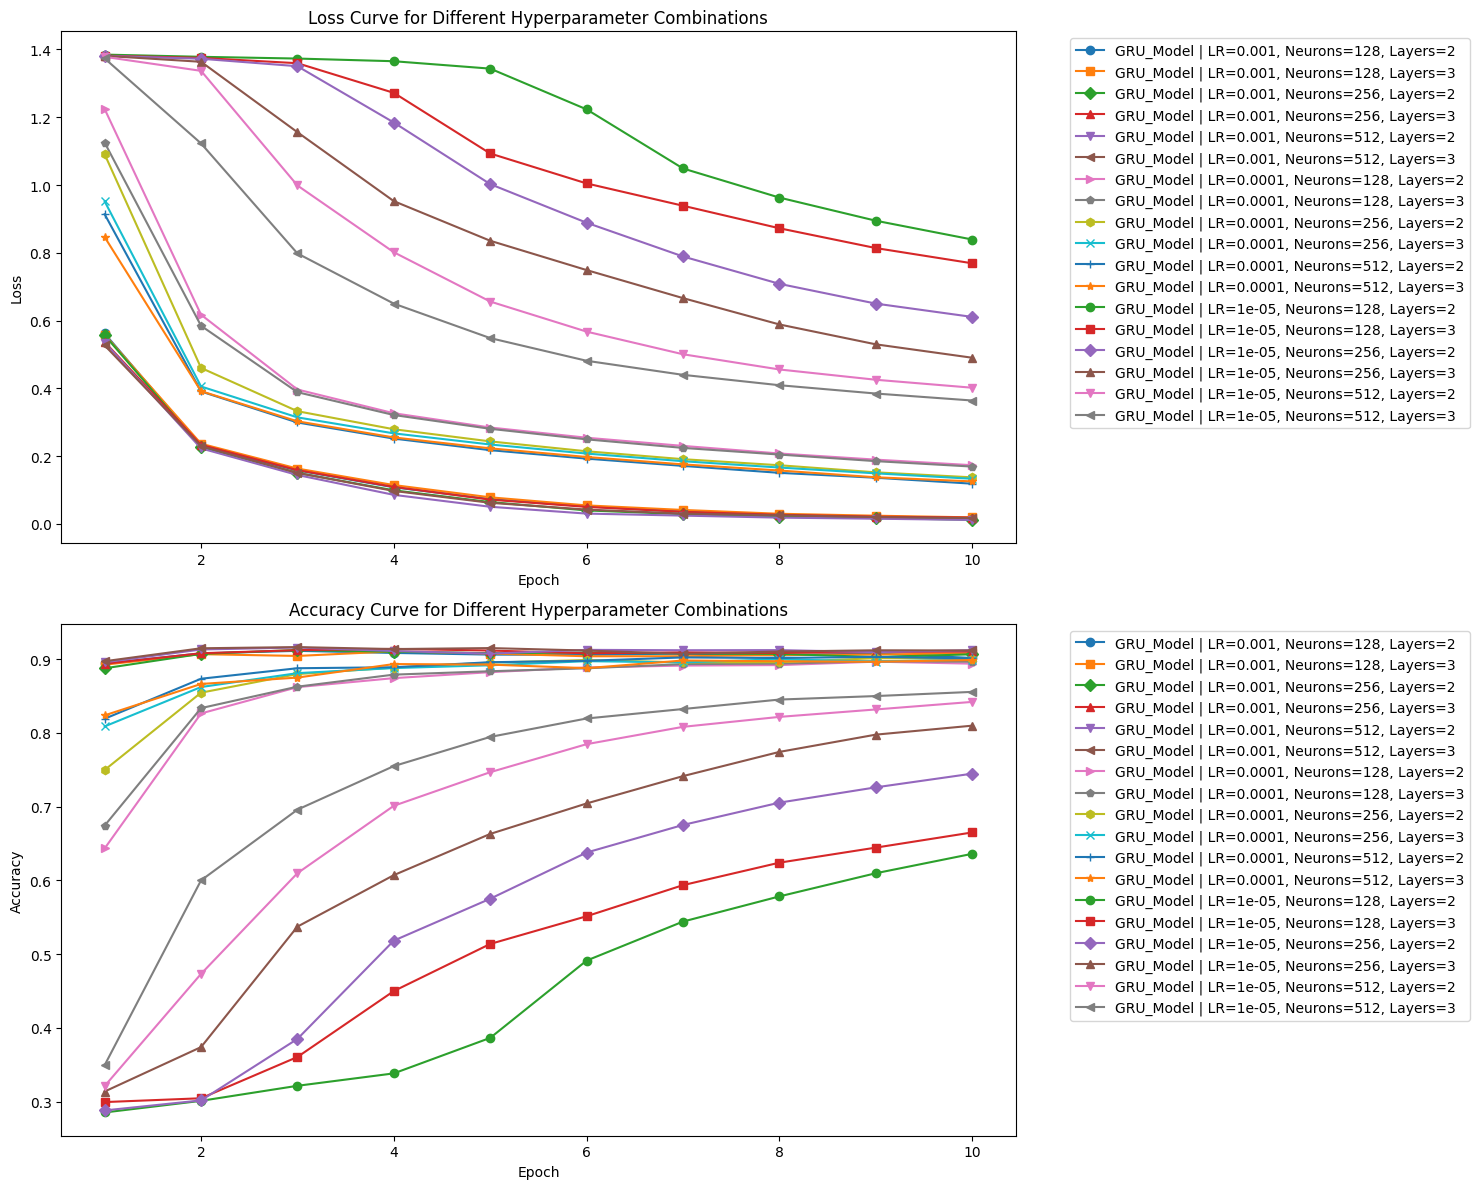

In [66]:
# Plotting Grid Search Results for GRU Model

plot_grid_search_results(results_df_gru)

In [76]:
# Added seed for reproducibility
torch.manual_seed(42)

epochs = 10
lr = best_params_gru['learning_rate']
neurons = best_params_gru['hidden_size']
layers = best_params_gru['layers']

# instantiate model
gru_model = GRU_Model(EMBEDDING_SIZE, neurons, layers, NUM_CLASSES)
gru_model.to(device)

# The adam optimiser is used, we added the weight decay parameter to regularize the weights, for suggestion of the professor, it is fixed at 1e-4
optimiser = torch.optim.Adam(gru_model.parameters(), lr=lr, weight_decay=1e-4)

In [77]:
# Added seed for reproducibility
torch.manual_seed(42)

print(f"Training GRU model with learning rate={lr}, hidden neurons={neurons}, layers={layers}")

# Training the model with the GRU architecture
accuracy_history_gru, loss_history_gru = train(gru_model, optimiser=optimiser, epochs=epochs)

Training GRU model with learning rate=0.001, hidden neurons=512, layers=2


Epoch 1/10: 100%|██████████| 422/422 [00:12<00:00, 34.91it/s]


Epoch [1/10], Loss: 0.5933
Validation Accuracy: 0.88%
Improved validation accuracy to 0.88%


Epoch 2/10: 100%|██████████| 422/422 [00:12<00:00, 34.74it/s]


Epoch [2/10], Loss: 0.3041
Validation Accuracy: 0.90%
Improved validation accuracy to 0.90%


Epoch 3/10: 100%|██████████| 422/422 [00:12<00:00, 34.29it/s]


Epoch [3/10], Loss: 0.2551
Validation Accuracy: 0.89%
No significant improvement. Patience counter: 1/2


Epoch 4/10: 100%|██████████| 422/422 [00:12<00:00, 34.29it/s]


Epoch [4/10], Loss: 0.2214
Validation Accuracy: 0.91%
Improved validation accuracy to 0.91%


Epoch 5/10: 100%|██████████| 422/422 [00:12<00:00, 34.25it/s]


Epoch [5/10], Loss: 0.1983
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 1/2


Epoch 6/10: 100%|██████████| 422/422 [00:12<00:00, 34.10it/s]


Epoch [6/10], Loss: 0.1774
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 2/2
Early stopping due to no significant improvement in validation accuracy.
Training complete.


In [78]:
# Validation accuracy of the model with the GRU architecture on the test set
print(f'Test accuracy for GRU model is: {accuracy(gru_model, test_loader):.4f}')

Test accuracy for GRU model is: 0.9170


#### Plotting the loss and accuracy behaviors from the training process for the GRU model results

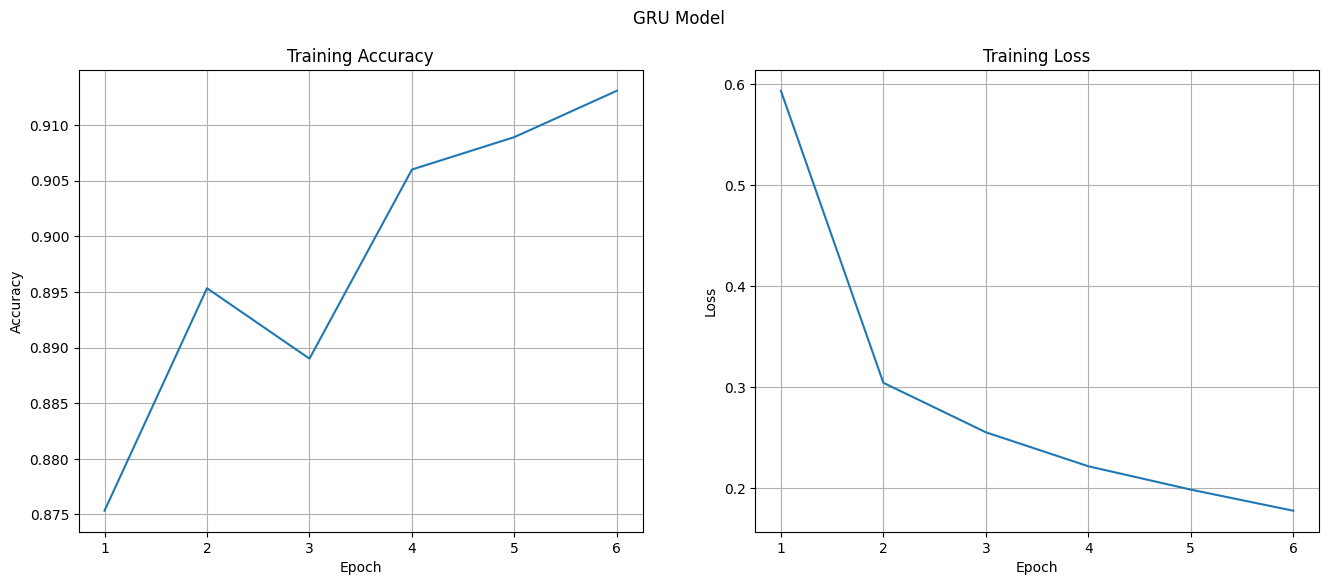

In [79]:
plot_train_loss_and_accuracy("GRU Model", accuracy_history_gru, loss_history_gru)

### LSTM model example

In [83]:
class LSTM_Model(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        
        # Embedding layer to convert token indices to embeddings
        self.embedding_layer = nn.Embedding(
            num_embeddings=len(vocab),
            embedding_dim=embed_size
        )
        
        # LSTM layer for improved sequence handling
        self.rnn = nn.LSTM(
            input_size=embed_size,
            hidden_size=hidden,
            num_layers=layers,
            batch_first=True
        )
        
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden, num_classes) 

    def forward(self, x):
        embedded = self.embedding_layer(x)
        
        # Forward pass through the LSTM
        output, (hidden, cell) = self.rnn(embedded)
        
        # Take the last hidden state from the sequence for classification
        output = hidden[-1]
        
        # Fully connected layer for final output
        return self.fc(output)


#### Looking for the best hyperparameters using Grid Search for the LSTM model

We will test the LSTM model using a combination of hyperparameters that we found in the Grid Search.

The candidate hyperparameters are:
- learning rates = [1e-3, 1e-4, 1e-5]
- hidden_sizes = [128, 256, 512]
- num_layers = [2, 3]

We are selecting learning rate 1e-3, and 2 hidden layers, as the starting points because they are the most common numbers of LR and layers in the literature.

In [84]:
learning_rates = [1e-3, 1e-4, 1e-5]
hidden_sizes = [128, 256, 512]
num_layers_options = [2, 3]

# Example for Simple RNN Model
best_params_lstm, best_acc_lstm, results_df_lstm = grid_search_with_plot(
    model_class=LSTM_Model,
    train_loader=train_loader,
    val_loader=val_loader,
    embed_size=EMBEDDING_SIZE,
    num_classes=NUM_CLASSES,
    learning_rates=learning_rates,
    hidden_sizes=hidden_sizes,
    num_layers_options=num_layers_options,
    epochs=10
)

Grid search for LSTM_Model started.
Validating Case: LR=0.001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:20<00:00,  8.07s/it]


Validating Case: LR=0.001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:32<00:00,  9.26s/it]


Validating Case: LR=0.001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:28<00:00,  8.87s/it]


Validating Case: LR=0.001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:41<00:00, 10.19s/it]


Validating Case: LR=0.001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:17<00:00, 13.70s/it]


Validating Case: LR=0.001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [03:00<00:00, 18.07s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:22<00:00,  8.20s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:32<00:00,  9.20s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:27<00:00,  8.79s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:38<00:00,  9.86s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:14<00:00, 13.44s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:57<00:00, 17.72s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:19<00:00,  7.90s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:29<00:00,  8.93s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:26<00:00,  8.65s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:38<00:00,  9.86s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:14<00:00, 13.45s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:56<00:00, 17.69s/it]

Best Configuration: {'learning_rate': 0.001, 'hidden_size': 512, 'layers': 3}
Best Validation Accuracy: 0.9109166666666667


#### Plotting the results of the Grid Search for the LSTM model

We will plot the results of the Grid Search for the LSTM model and compare them with the results visually.

Best LSTM Configuration: {'learning_rate': 0.001, 'hidden_size': 512, 'layers': 3}


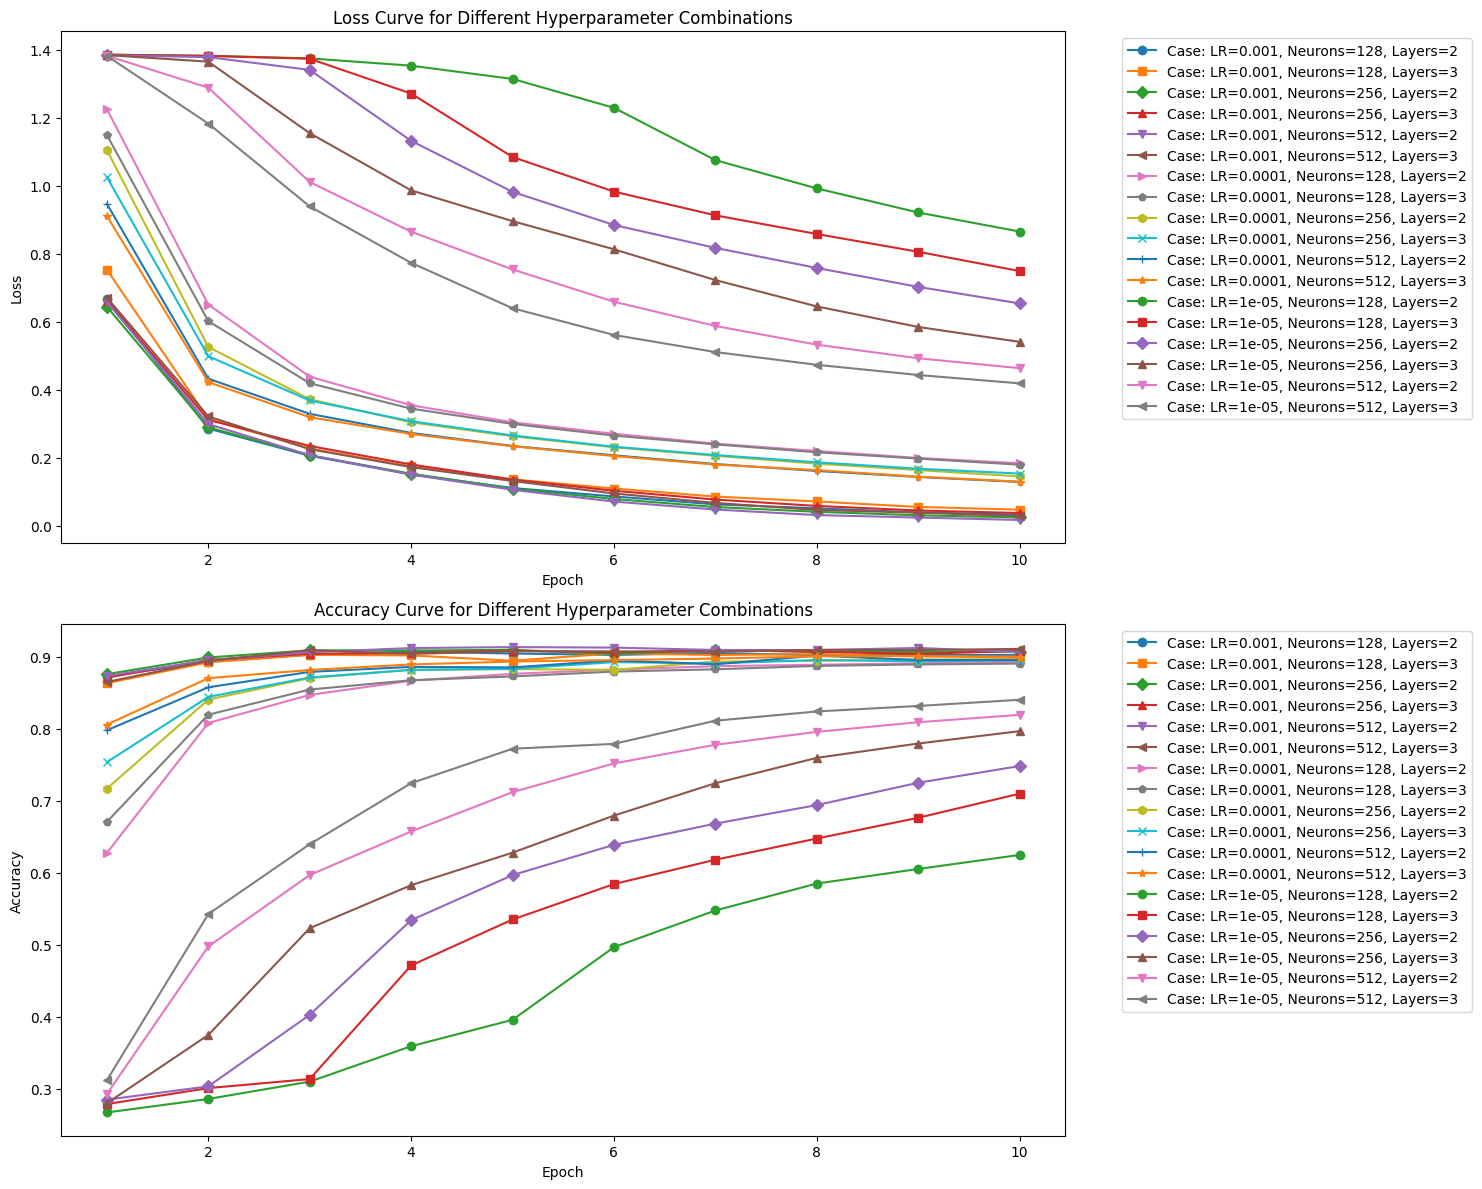

In [85]:
print(f"Best LSTM Configuration: {best_params_lstm}")

plot_grid_search_results(results_df_lstm)

In [91]:
# Added seed for reproducibility
torch.manual_seed(42)

epochs = 10
lr = best_params_lstm['learning_rate']
neurons = best_params_lstm['hidden_size']
layers = best_params_lstm['layers']

# instantiate model
lstm_model = LSTM_Model(EMBEDDING_SIZE, neurons, layers, NUM_CLASSES)
lstm_model.to(device)

# The adam optimiser is used, we added the weight decay parameter to regularize the weights, for suggestion of the professor, it is fixed at 1e-4
optimiser = torch.optim.Adam(lstm_model.parameters(), lr=lr, weight_decay=1e-4)


In [92]:
# Added seed for reproducibility
torch.manual_seed(42)

print(f"Training LSTM model with learning rate={lr}, hidden neurons={neurons}, layers={layers}")

# Training the model with the LSTM architecture
accuracy_history_lstm, loss_history_lstm = train(lstm_model, optimiser=optimiser,  epochs=epochs)

Training LSTM model with learning rate=0.001, hidden neurons=512, layers=3


Epoch 1/10: 100%|██████████| 422/422 [00:17<00:00, 24.19it/s]


Epoch [1/10], Loss: 0.7623
Validation Accuracy: 0.84%
Improved validation accuracy to 0.84%


Epoch 2/10: 100%|██████████| 422/422 [00:17<00:00, 23.73it/s]


Epoch [2/10], Loss: 0.4047
Validation Accuracy: 0.86%
Improved validation accuracy to 0.86%


Epoch 3/10: 100%|██████████| 422/422 [00:17<00:00, 23.65it/s]


Epoch [3/10], Loss: 0.3170
Validation Accuracy: 0.88%
Improved validation accuracy to 0.88%


Epoch 4/10: 100%|██████████| 422/422 [00:17<00:00, 23.62it/s]


Epoch [4/10], Loss: 0.2749
Validation Accuracy: 0.90%
Improved validation accuracy to 0.90%


Epoch 5/10: 100%|██████████| 422/422 [00:17<00:00, 23.58it/s]


Epoch [5/10], Loss: 0.2413
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 1/2


Epoch 6/10: 100%|██████████| 422/422 [00:17<00:00, 23.54it/s]


Epoch [6/10], Loss: 0.2142
Validation Accuracy: 0.91%
Improved validation accuracy to 0.91%


Epoch 7/10: 100%|██████████| 422/422 [00:17<00:00, 23.47it/s]


Epoch [7/10], Loss: 0.1968
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 1/2


Epoch 8/10: 100%|██████████| 422/422 [00:17<00:00, 23.53it/s]


Epoch [8/10], Loss: 0.1812
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 2/2
Early stopping due to no significant improvement in validation accuracy.
Training complete.


In [93]:
# Validation accuracy of the model with the LSTM architecture on the test set
print(f'Test accuracy for LSTM model is: {accuracy(lstm_model, test_loader):.4f}')

Test accuracy for LSTM model is: 0.9074


#### Plotting the loss and accuracy behaviors from the training process for the GRU model results

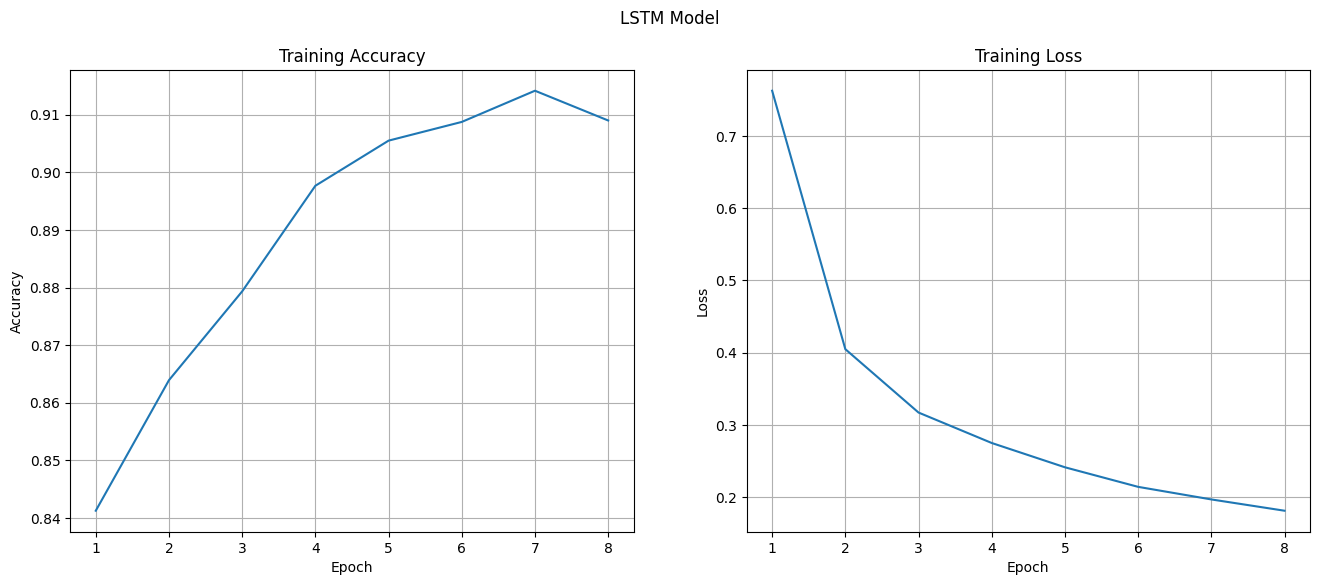

In [94]:
plot_train_loss_and_accuracy("LSTM Model", accuracy_history_lstm, loss_history_lstm)

In [98]:
def sample_text(models, model_names, loader, vocab, num_samples=5):
    assert len(models) == len(model_names), "Each model must have a corresponding name."

    # Set models to evaluation mode
    for model in models:
        model.eval()

    examples = []

    # Collect predictions and true labels
    with torch.no_grad():
        for inputs, labels in loader:
            # Move data to the correct device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Get the batch size for random sampling
            batch_size = inputs.shape[0]

            # Get predictions for each model
            model_predictions = []
            for model in models:
                outputs = model(inputs)
                predicted_classes = torch.argmax(outputs, dim=1)
                model_predictions.append(predicted_classes.cpu().numpy())

            # Convert true labels to a list
            labels = labels.cpu().numpy()

            # Randomly sample indices from the batch
            sample_indices = random.sample(range(batch_size), min(num_samples, batch_size))

            # Gather the original texts, predicted classes, and true labels
            for idx in sample_indices:
                original_text = " ".join([vocab.lookup_token(i) for i in inputs[idx].cpu().numpy() if i != vocab["<pad>"]])
                true_label = labels[idx]
                predictions = [model_pred[idx] for model_pred in model_predictions]

                examples.append((original_text, predictions, true_label))

            # Stop once we have collected enough examples
            if len(examples) >= num_samples:
                break

    # Display the examples
    print("Sample Predictions from All Models:")
    for i, (text, preds, true) in enumerate(examples):
        print(f"\nExample {i+1}:")
        print(f"Original Text: {text}")
        print(f"True Label: {true}")
        for model_name, pred in zip(model_names, preds):
            result = "✅ Correct" if pred == true else "❌ Incorrect"
            print(f"{model_name} Prediction: {pred} - {result}")
        print("-" * 50)

In [99]:
# Usage
models = [lstm_model, gru_model, rnn_model]
model_names = ["LSTM Model", "GRU Model", "Simple RNN Model"]
sample_text(models, model_names, test_loader, vocab)

Sample Predictions from All Models:

Example 1:
Original Text: void is filled with clement with the supply of attractive pitching options dwindling daily -- they lost pedro martinez to the mets , missed on tim hudson , and are resigned to randy johnson becoming a yankee -- the red sox struck again last night , coming to terms with
True Label: 1
LSTM Model Prediction: 1 - ✅ Correct
GRU Model Prediction: 1 - ✅ Correct
Simple RNN Model Prediction: 1 - ✅ Correct
--------------------------------------------------

Example 2:
Original Text: ex-enron executive testifies about cover-up the first witness in the first enron criminal trial testified this morning she believed those higher up than both she and the enron accountant now on trial were in on an effort to hide illicit
True Label: 2
LSTM Model Prediction: 2 - ✅ Correct
GRU Model Prediction: 2 - ✅ Correct
Simple RNN Model Prediction: 1 - ❌ Incorrect
--------------------------------------------------

Example 3:
Original Text: american cro

In [104]:
# create confusion matrix
def display_confusion_matrices(models, model_names, loader):
    assert len(models) == len(model_names), "Each model must have a corresponding name."

    for model, name in zip(models, model_names):
        model.eval()  # Set model to evaluation mode
        all_preds = []
        all_labels = []

        # Collect predictions and true labels
        with torch.no_grad():
            for inputs, labels in loader:
                # Move data to the correct device
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Compute confusion matrix
        cm = confusion_matrix(all_labels, all_preds)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

        # Calculate common mistakes
        most_common_mistakes = {}
        for true_label in range(cm.shape[0]):
            # Exclude the diagonal (correct predictions)
            predicted_errors = cm[true_label, :] - np.eye(cm.shape[0])[true_label] * cm[true_label, true_label]
            common_error_idx = np.argmax(predicted_errors)
            most_common_mistakes[true_label] = common_error_idx

        # Print a description of the most common mistakes
        print(f"Most common mistakes for {name}:")
        for true_class, mistaken_class in most_common_mistakes.items():
            print(f" - True class {true_class} is often mistaken as class {mistaken_class}")
        print("-" * 50)



<Figure size 800x600 with 0 Axes>

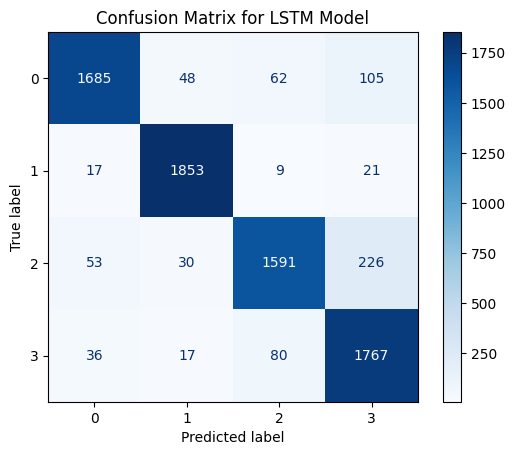

Most common mistakes for LSTM Model:
 - True class 0 is often mistaken as class 3
 - True class 1 is often mistaken as class 3
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


<Figure size 800x600 with 0 Axes>

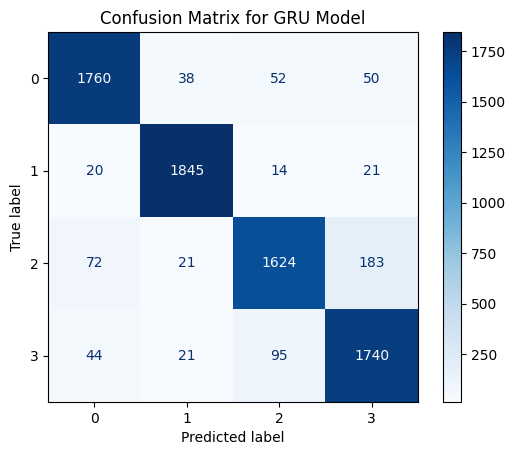

Most common mistakes for GRU Model:
 - True class 0 is often mistaken as class 2
 - True class 1 is often mistaken as class 3
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


<Figure size 800x600 with 0 Axes>

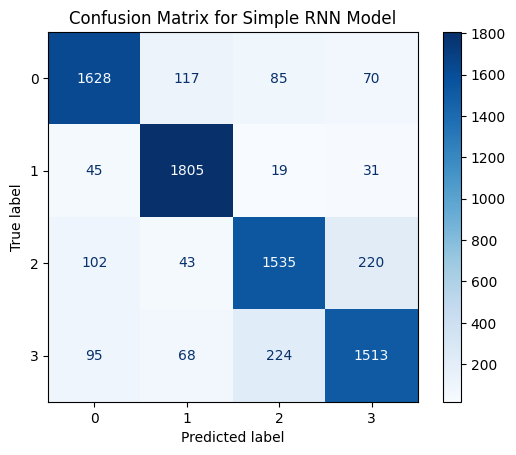

Most common mistakes for Simple RNN Model:
 - True class 0 is often mistaken as class 1
 - True class 1 is often mistaken as class 0
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


In [105]:
# Usage
models = [lstm_model, gru_model, rnn_model]
model_names = ["LSTM Model", "GRU Model", "Simple RNN Model"]
display_confusion_matrices(models, model_names, test_loader)